# LA Bike Demand

- Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

- The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.



- 캐글에 들어가서 train데이터와 test데이터 다운받기:

https://www.kaggle.com/c/bike-sharing-demand



In [1]:
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("biketrain.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

FileNotFoundError: [Errno 2] File biketrain.csv does not exist: 'biketrain.csv'

## Explore

In [24]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Explore datetime
- 날짜데이터 파싱하기

In [26]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()
train.head()

(10886, 18)


datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  datetime-year  \
0        81        0.0       3          13     16           2011   
1        80        0.0       8          32     40           2011   
2        80        0.0       5          27     32           2011   
3        75        0.0       3          10     13           2011   
4        75        0.0       0           1      1           2011   

   datetime-month  datetime-day  datetime-hour  datetime-minute  \
0               1             1              0                0   
1               1             1              1                0   
2               1             1              2                0   
3               1             1              3                0   
4               1             1              4                0   

   datetime-second  
0                0  
1                0  
2                0  
3                0  
4                0

- 년도, 월, 날짜, 시간에 따라 자전거 대여댓수의 차이가 클까?

C:\Users\ccby0476\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


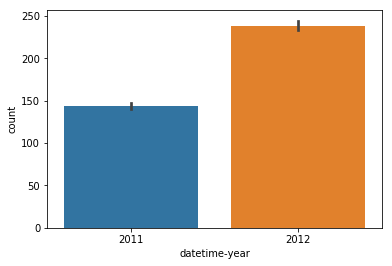

In [27]:
sns.barplot(data=train, x="datetime-year", y="count")

C:\Users\ccby0476\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


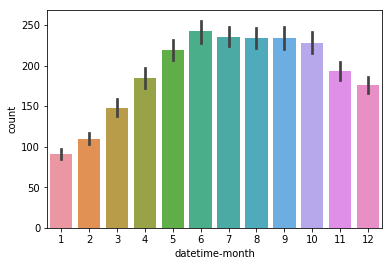

In [11]:
sns.barplot(data=train, x="datetime-month", y="count")

C:\Users\ccby0476\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


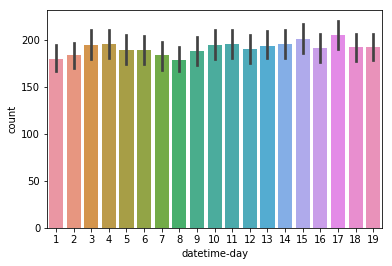

In [12]:
sns.barplot(data=train, x="datetime-day", y="count")

C:\Users\ccby0476\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


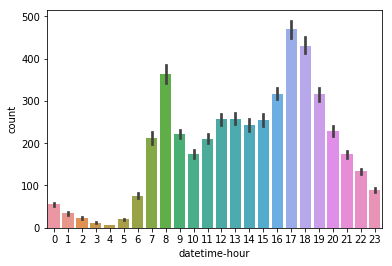

In [13]:
sns.barplot(data=train, x="datetime-hour", y="count")

C:\Users\ccby0476\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


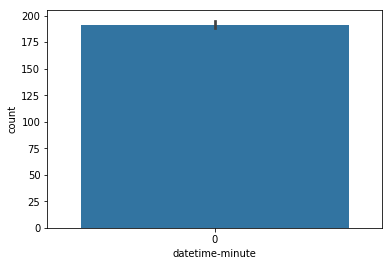

In [14]:
sns.barplot(data=train, x="datetime-minute", y="count")


C:\Users\ccby0476\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


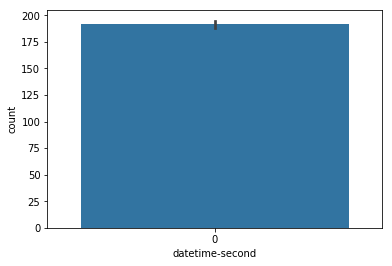

In [15]:
sns.barplot(data=train, x="datetime-second", y="count")

C:\Users\ccby0476\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


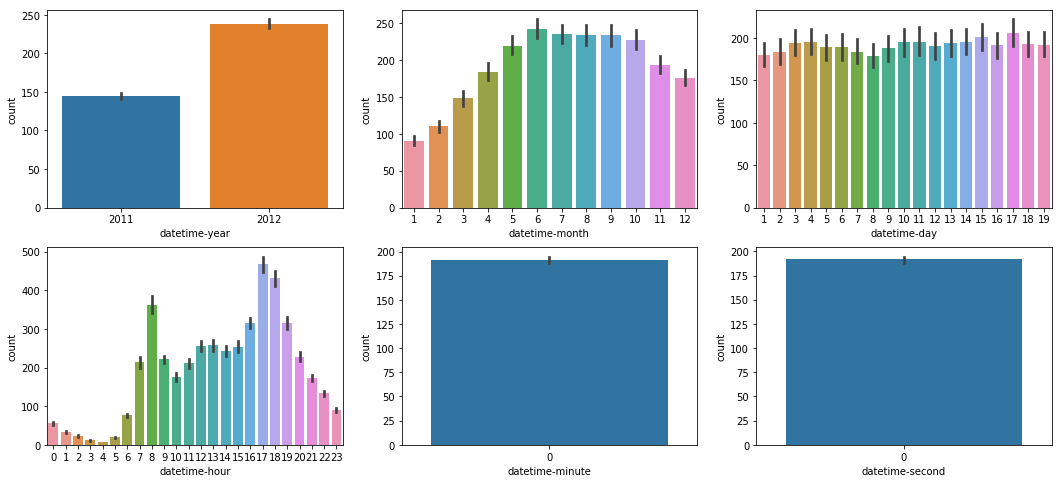

In [16]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

** Lesson Learned **
  * **datetime-minute**와 **datetime-second**는 현재 기록되고 있지 않다. 그러므로 사용할 필요가 없다.
  * train.csv와 test.csv는 **datetime-day**를 기준으로 나뉘어져 있다. 그러므로 **datetime-day**를 feature로 사용해서는 안 된다.

### Explore hour - workingday
- 그렇다면 주중과 주말의 대여수요의 차이는?

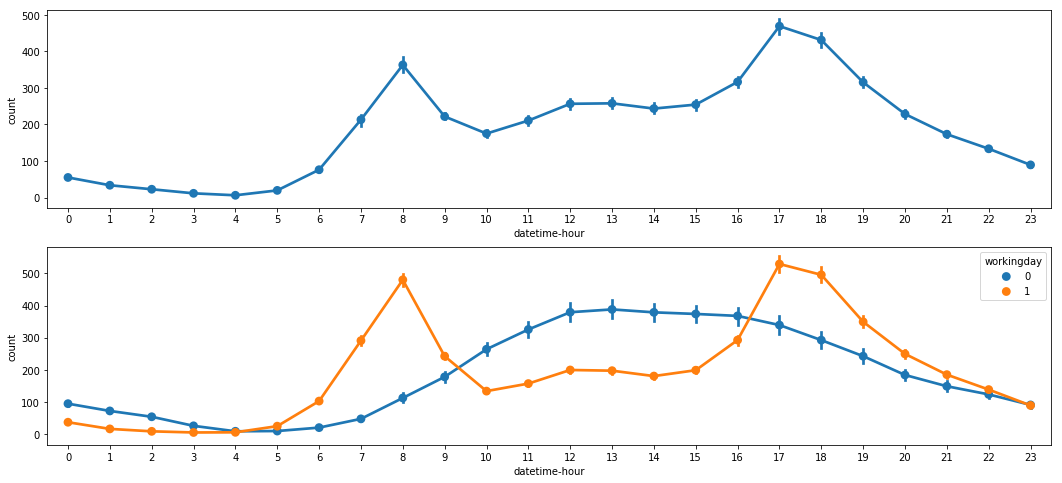

In [6]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

** Lesson Learned **
  * 주중(workingday==1)에는 출근 시간과 퇴근 시간에 자전거를 많이 대여한다.
  * 주말(workingday==0)에는 오후 시간에 자전거를 많이 대여한다.
  * 주중(월,화,수,목,금)이 주말(토,일)보다 많기 때문에, 두 개를 나눠서 보지 않으면 주말의 특성을 파악할 수 없다.

### Explore hour - dayofweek
- 요일에 따라서도 달라지지 않을까?

In [7]:
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 19)


datetime  datetime-dayofweek
0 2011-01-01 00:00:00                   5
1 2011-01-01 01:00:00                   5
2 2011-01-01 02:00:00                   5
3 2011-01-01 03:00:00                   5
4 2011-01-01 04:00:00                   5

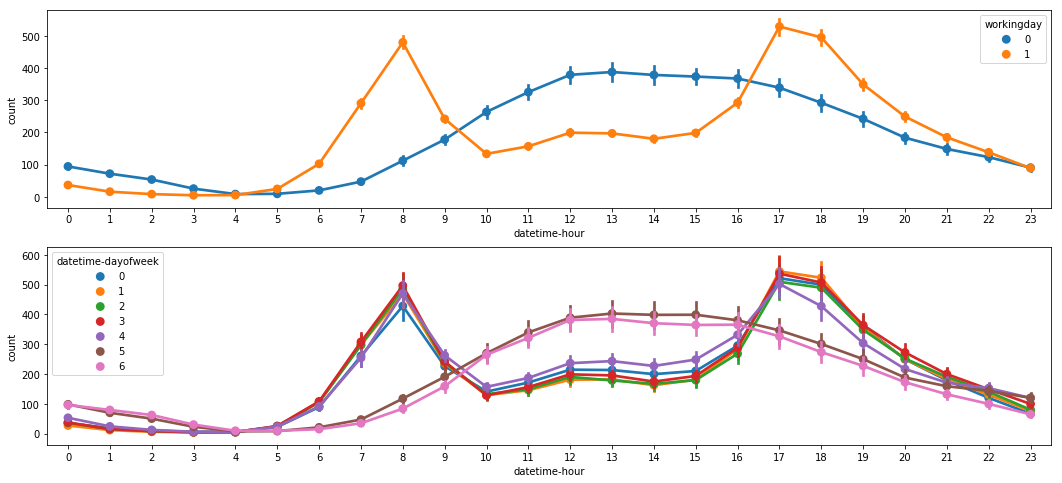

In [8]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

** Lesson Learned **
  * 금요일(workingday==4)는 주중이지만, 아주 약간 주말의 특성을 반영하고 있다.
  * 비슷하게 월요일(workingday==0)도 아주 약간 주말의 특성을 반영하고 있다.
  * 사람들이 휴가를 월요일과 금요일에 사용하기 때문이라고 추측할 수 있다.

### Concatenate year and month
- 그런데 알고보니, 년도 달을 합치면 또다른 insight를 얻게 된다

In [9]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 20)


datetime datetime-year_month
0 2011-01-01 00:00:00              2011-1
1 2011-01-01 01:00:00              2011-1
2 2011-01-01 02:00:00              2011-1
3 2011-01-01 03:00:00              2011-1
4 2011-01-01 04:00:00              2011-1

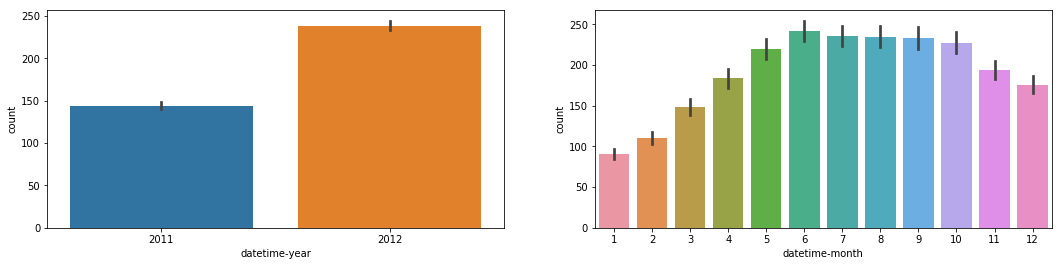

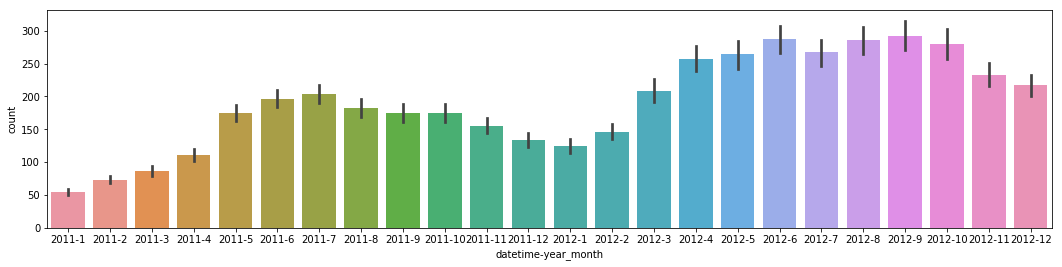

In [10]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)


figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

** Lesson Learned **
  * 2011년 12월과 2012년 1월의 자전거 대여량을 비슷하지만, 두 개를 따로 놓고 보면 이를 알 수 없다.
  * 2011년에는 8월부터 대여량이 감소하고, 2012년에는 7월부터 대여량이 감소한다. 마찬가지로 따로 놓고 보면 이를 알 수 없다.